# Prosper Data Loan Exploration
## by Mahmoud Alaa



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [5]:
df['LoanStatus'].value_counts(normalize=True)


Current                   0.496555
Completed                 0.334167
Chargedoff                0.105251
Defaulted                 0.044042
Past Due (1-15 days)      0.007074
Past Due (31-60 days)     0.003186
Past Due (61-90 days)     0.002747
Past Due (91-120 days)    0.002668
Past Due (16-30 days)     0.002326
FinalPaymentInProgress    0.001799
Past Due (>120 days)      0.000140
Cancelled                 0.000044
Name: LoanStatus, dtype: float64

In [6]:
df.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

### What is the structure of your dataset?

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

### What is/are the main feature(s) of interest in your dataset?

Borrower Annual Percentage Rate and Loan Status 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

StatedMonthlyIncome,
EmploymentStatus,
EmploymentStatusDuration,
CreditScoreRangeLower,
Loan Original Amount,
Credit Score,
Prosper Rating,
Prosper Score,
Terms of the loan and the number of investors

### What is the frequency and percentage of Loan Status values ?

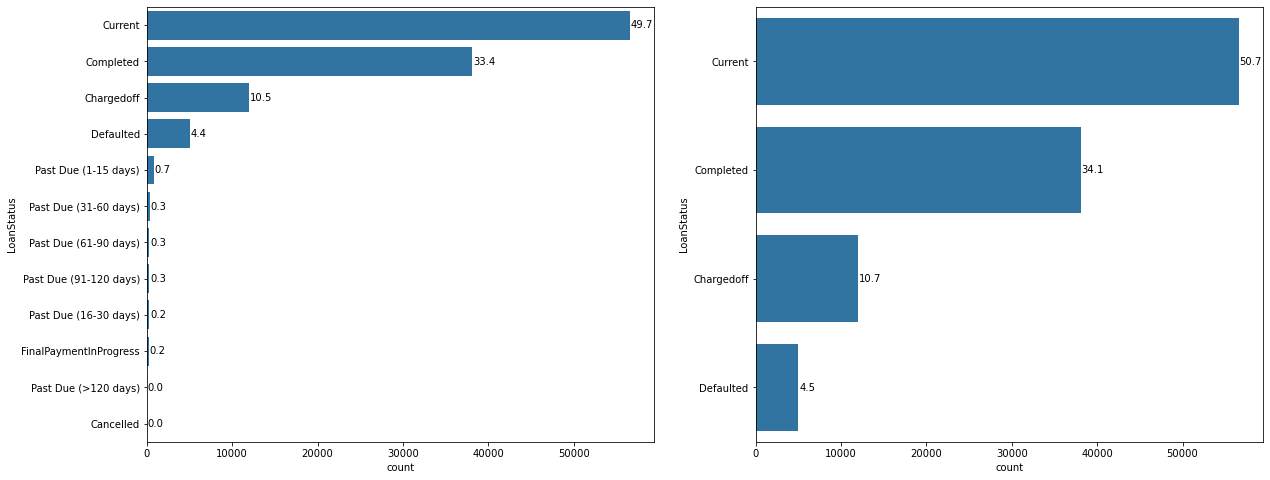

In [7]:
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
n_loanstatus = df['LoanStatus'].value_counts().sum()
type_counts = df['LoanStatus'].value_counts()
type_order = df['LoanStatus'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='LoanStatus', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_loanstatus)
    # Print the string value on the bar. 
    plt.text(count+100, i, pct_string, va='center')


plt.subplot(1,2,2)
df = df.query(' LoanStatus == ["Current","Completed","Chargedoff","Defaulted"] ')
n_loanstatus = df['LoanStatus'].value_counts().sum()
type_counts = df['LoanStatus'].value_counts()
type_order = df['LoanStatus'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='LoanStatus', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_loanstatus)
    # Print the string value on the bar. 
    plt.text(count+100, i, pct_string, va='center')





We Can see from this plot that about 50% of the Loan Status is Current it means that they have recently made a payment 
and 33.5% Completed their payment 
10.5% Charged off and 4.4% Defaulted on their payments
and their is about less than 2% that Past due their payments




### How is the distribution of Interest Rate and Annual Percentage Rate looks like ?

Text(0, 0.5, 'Frequency')

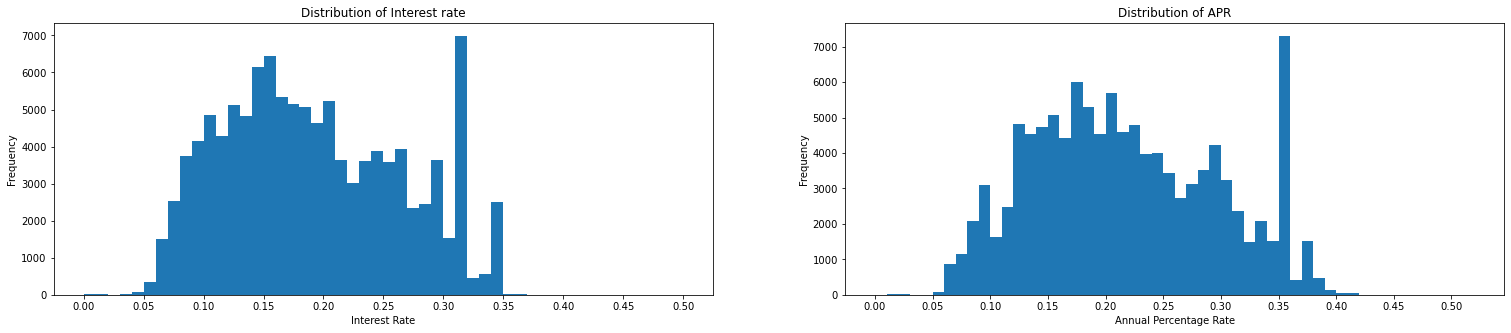

In [8]:
plt.figure(figsize = [26, 5])
plt.subplot(1, 2, 1)

bins = np.arange(0,df["BorrowerRate"].max()+0.01,0.01)
plt.hist(df['BorrowerRate'],bins=bins)
plt.xlabel("Interest Rate")
plt.title("Distribution of Interest rate")
plt.ylabel("Frequency")
plt.xticks(np.arange(0,0.5+0.05,0.05))



plt.subplot(1, 2,2)

bins = np.arange(0,df["BorrowerAPR"].max()+0.01,0.01);
plt.hist(df["BorrowerAPR"],bins=bins);
plt.xlabel("Annual Percentage Rate")
plt.xticks(np.arange(0,0.5+0.05,0.05))
plt.title("Distribution of APR")
plt.ylabel("Frequency")

We can see that interst rate is between 0.05 and 0.35 for the most of the borrowers and there is very little number of borrowers with more the 0.4 interset rate and APR,
and the most frequency interest rate is about 3.2
In the Annual percentage rate which is Interest rate including fees the most frequency APR is about 3.6


---

### Is there any outliers in the Monthly Income of the borrower ?

In [9]:
df[['StatedMonthlyIncome']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111660 entries, 0 to 113936
Data columns (total 1 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   StatedMonthlyIncome  111660 non-null  float64
dtypes: float64(1)
memory usage: 5.7 MB


Text(0, 0.5, 'frequency')

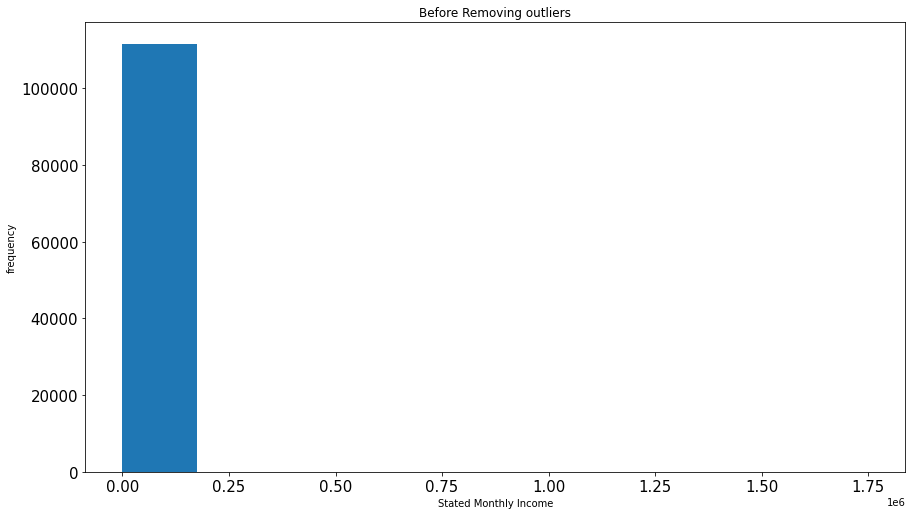

In [10]:
plt.figure(figsize=[14.70, 8.27]);
plt.xticks(size=15)
plt.yticks(size=15,rotation=0)

plt.hist(df["StatedMonthlyIncome"])
plt.title("Before Removing outliers")
plt.xlabel("Stated Monthly Income")
plt.ylabel("frequency")

In [11]:
df = df[df['StatedMonthlyIncome']<=20000]
df[['StatedMonthlyIncome']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110487 entries, 0 to 113936
Data columns (total 1 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   StatedMonthlyIncome  110487 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


Text(0.5, 1.0, 'After Removing outliers of the Monthly Income')

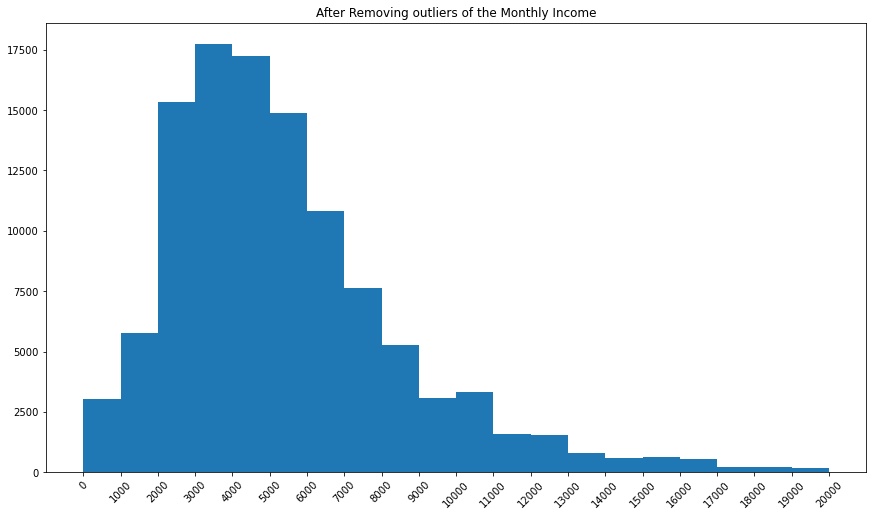

In [12]:
plt.figure(figsize=[14.70, 8.27]);

#plt.subplot(1,2,1)
bin = np.arange(0,21000,1000)
plt.hist(df["StatedMonthlyIncome"],bins = bin)
plt.xticks(bin,rotation=45);
plt.title("After Removing outliers of the Monthly Income")

We can see that the monthly income is right skewed and the most frequent monthly income between 3000 and 5000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Distribution of the interest rate and Anuual percentage rate is multimodal distribution as we can see many peaks in the histogram and we don't need to perform any transformations
and In the Loan Status We will consider only the biggest 4 frequencies of loan statues


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The Monthly Income was having outliers ,I removed it then the distribution of the data become right skewed and we can gain information about the most frequent monthly income

---

## Bivariate Exploration


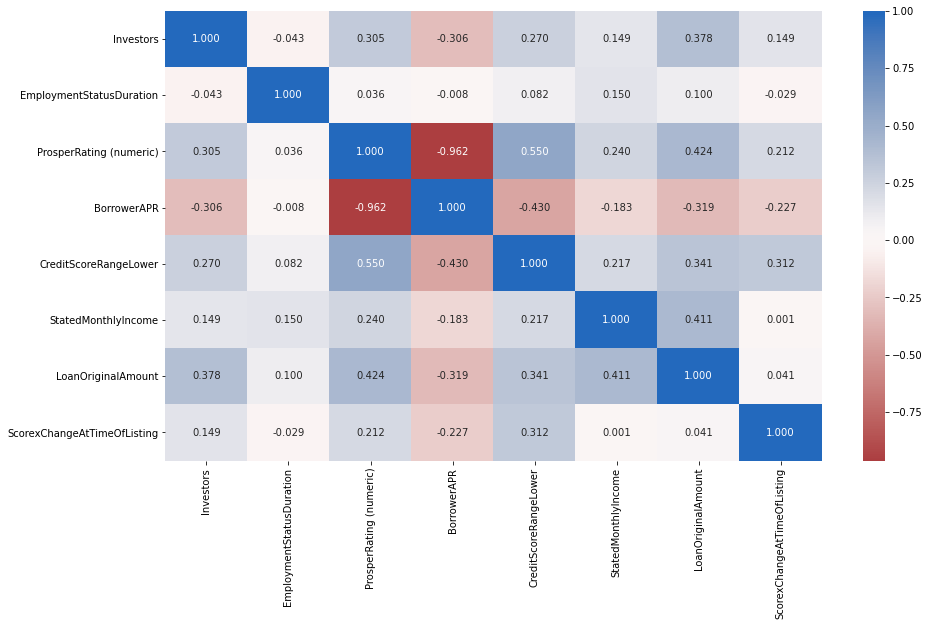

In [13]:
#df = df.dropna(subset=['ProsperRating (numeric)'])
numeric_vars = ['Investors','EmploymentStatusDuration','ProsperRating (numeric)','BorrowerAPR','CreditScoreRangeLower','StatedMonthlyIncome','IncomeRange','LoanOriginalAmount','ScorexChangeAtTimeOfListing']

#df = df.dropna(subset= numeric_vars)
plt.figure(figsize=[14.70, 8.27]);
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Are the Prosper Rating and Employment Status affect the Loan status ?

ProsperRating Estimated Avg. Annual Loss Rate**

•AA                 0.00-1.99%

•A	                2.00–3.99%

•B	                4.00–5.99%

•C	                6.00–8.99%

•D	                9.00–11.99%

•E	                12.00–14.99%

•HR	                ≥ 15.00%

Text(0.5, 1.0, 'Relative frequency of Loan Status for each Prosper Rating')

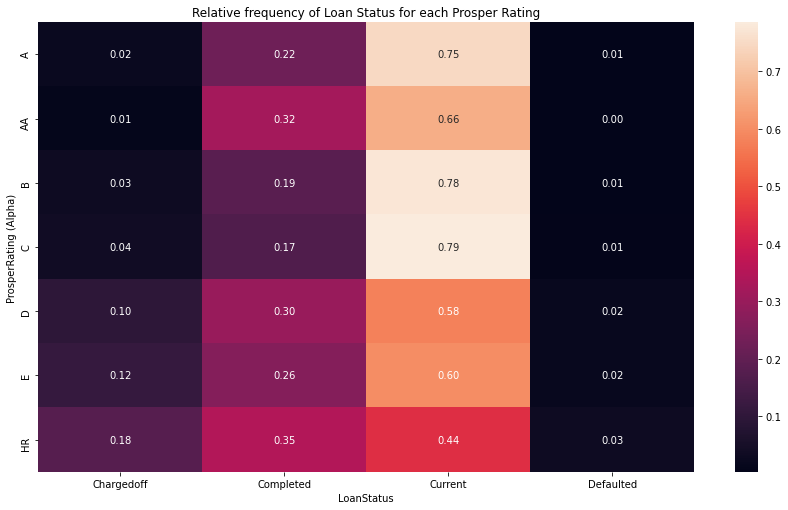

In [14]:
plt.figure(figsize=[14.70, 8.27]);

# relative frequency of Loan Status for each Prosper Rating
df = df.query("EmploymentStatus== ['Employed','Other','Full-time','Retired']")
cg_ls_table = df.groupby('ProsperRating (Alpha)')['LoanStatus'].value_counts(normalize=True).unstack('LoanStatus')
sb.heatmap(cg_ls_table,annot = True, fmt='.2f')
plt.title("Relative frequency of Loan Status for each Prosper Rating")


The Default loans are the lower in the absolute frequency

The absolute relative frequency of The Prosper Rating increase in the Chargedoff and Defaulted loans while The absolute relative frequency of The Prosper Rating is the bigger in the current loan

### We will Cosnder 4 types of Emplyment Status

Text(0.5, 1.0, 'Relative requency of Loan Status for each Employment Status')

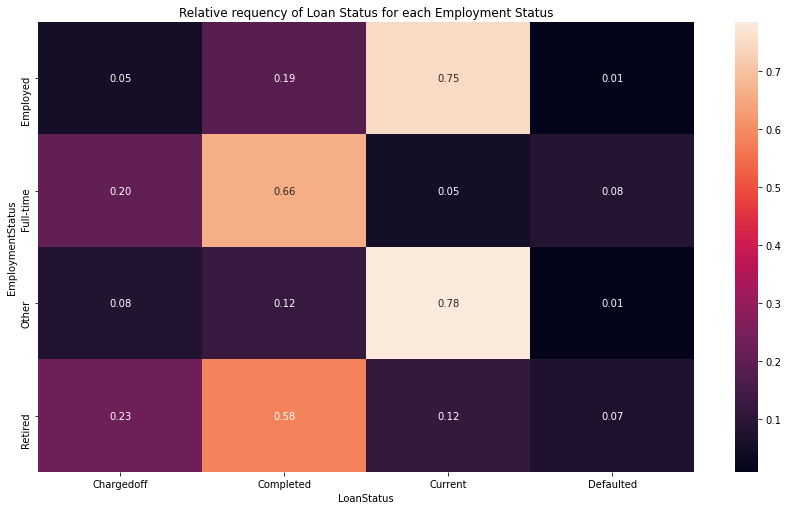

In [15]:
df = df.query("EmploymentStatus== ['Employed','Other','Full-time','Retired']")
plt.figure(figsize=[14.70, 8.27]);

# relative frequency of Loan Status for each Employment Status

es_ls_table = df.groupby('EmploymentStatus')['LoanStatus'].value_counts(normalize=True).unstack('LoanStatus')

sb.heatmap(es_ls_table,annot = True, fmt='.2f')

plt.title("Relative requency of Loan Status for each Employment Status")

High porpotion of Retired and Full time employees completed their loans :

58 % of Retired empolyees have completed their Loans

66 % of Full time empolyees have completed their Loans 

High porpotion of Employed and Other employees completed their loans is still current and we can see that :

75 % of Employed borrowers their loan still current

78 % of Other borrowers their loan still current


---

### Does the Credit Score affect Annual Percentage Rate ?

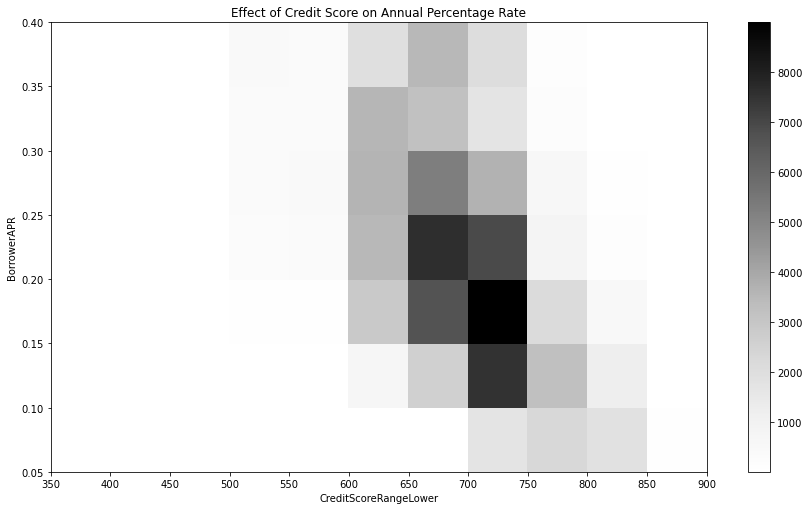

In [16]:
# Credit Score and APR
plt.figure(figsize=[14.70, 8.27]);

bins_x = np.arange(350, 950, 50)
bins_y = np.arange(0.05, 0.4+0.05, 0.05)
plt.hist2d(data = df, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', cmin=0.5, cmap=plt.cm.Greys,bins=[bins_x,bins_y]);
plt.colorbar();
plt.xlabel('CreditScoreRangeLower');
plt.ylabel('BorrowerAPR');
plt.title("Effect of Credit Score on Annual Percentage Rate")
plt.xticks(bins_x);

We can see if the Credit Score increases the APR decreases 

For Example the credit Score which is between 800 and 850 the most Frequent APR less than 0.1

and when the credit score was between 600 and 650 the Most frequent APR was between 0.15 and 0.35

### What is the relationship between ProsperRating and Borrower Annual Percentage Rate ?

Text(0.5, 1.0, 'Average of APR according to Prosper Rating')

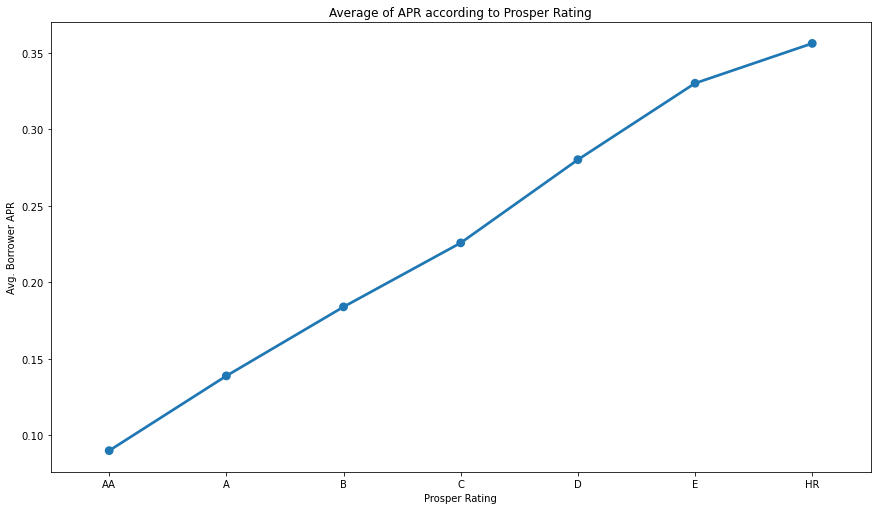

In [17]:

rating = ['AA', 'A', 'B', 'C', 'D','E','HR']
ratings = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ratings);


plt.figure(figsize=[14.70, 8.27]);


sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR');
plt.xlabel('Prosper Rating');
plt.ylabel('Avg. Borrower APR');
plt.title("Average of APR according to Prosper Rating")



As the prosper rating which represents an estimated average annualized loss rate range to the investor increases,the APR will increase too

they have strong positive correlation

---

### Does the prosper rating affect the Credit Score ?

Text(0.5, 1.0, 'Average of Credit Score according to Prosper Rating')

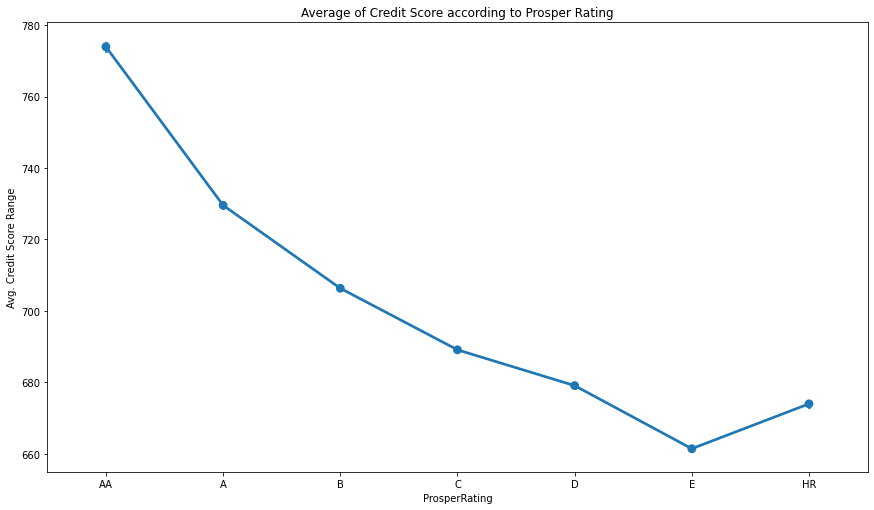

In [18]:
# prosper rating and credit score
plt.figure(figsize=[14.70, 8.27]);

sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'CreditScoreRangeLower');
plt.xlabel('ProsperRating');
plt.ylabel('Avg. Credit Score Range');
plt.title("Average of Credit Score according to Prosper Rating")


There is a strong negative relationship between Credit Score and Prosper Rating so if the Annual Estimated Loss decreases ,the borrower will have a good credit score

---

### Is the number of investors that funded the loan related to the Original Loan amount ?

Text(0.5, 1.0, 'Investors according to Loan Original Amount')

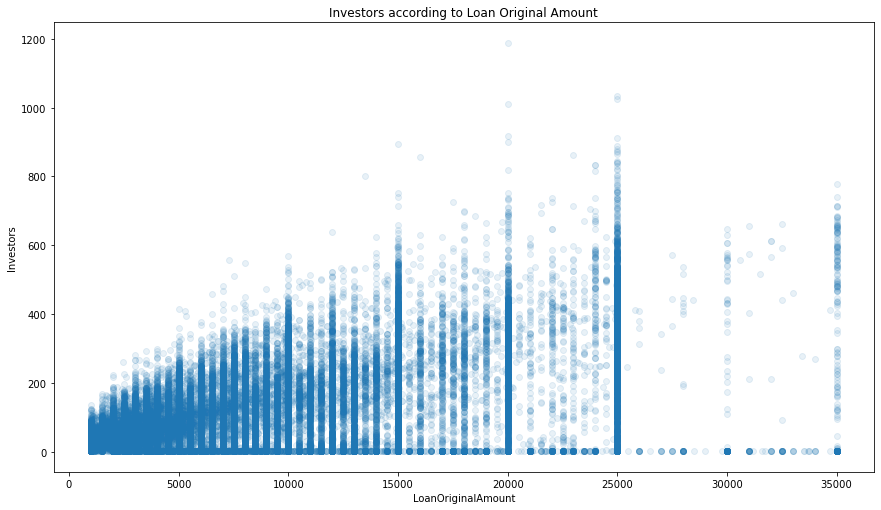

In [19]:
plt.figure(figsize=[14.70, 8.27]);

sb.regplot(data = df, y = 'Investors', x= 'LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Investors');
plt.title("Investors according to Loan Original Amount")


We can see that when the Loan amount increases the investors that fund the loan increase too

---

### Is there a relationship between the Credit Score and the number of months of the loan ?

Text(0.5, 1.0, 'Terms of Loans according to Credit Score')

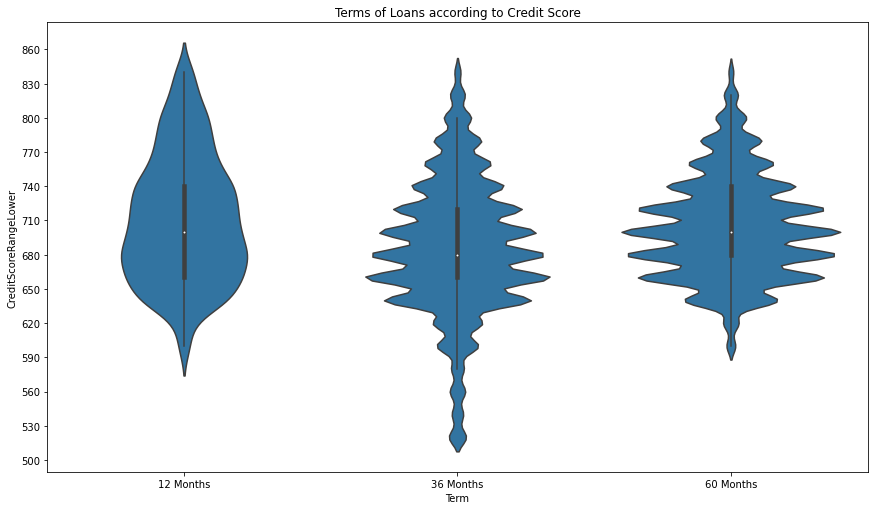

In [20]:
# The lowest Credit Score is 300 and the Highest is 850 according to FICO Score Credit Ranges
df = df.query("CreditScoreRangeLower >= 300 and CreditScoreRangeLower <= 850")

# FICO Credit Score Rating : https://www.cnbc.com/select/guide/credit-scores-for-beginners/#what-is-a-good-credit-score
plt.figure(figsize=[14.70, 8.27]);

# CreditScoreRangeLower and Term 
sb.violinplot(data=df, x='Term', y='CreditScoreRangeLower', color=base_color)
plt.yticks(np.arange(500,880,30))
plt.xticks([0,1,2],["12 Months","36 Months","60 Months"])
plt.title("Terms of Loans according to Credit Score")


We can see that all Credit Scores which less than about 560 their length of the loans is 36 months

In [21]:
#g = sb.catplot(x="LoanStatus", col="EmploymentStatus", col_wrap=5,data=df1,kind="count",color=base_color)


In [22]:
#samples = np.random.choice(df.shape[0], 500, replace = False)
#df_samp = df.loc[samples,:]

#g = sb.PairGrid(data = df_samp, vars = numeric_vars)
#g = g.map_diag(plt.hist, bins = 20);
#g.map_offdiag(plt.scatter)

In [23]:

plt.figure(figsize = [20, 10])
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color)
    plt.xticks(rotation=90)

#g = sb.PairGrid(data = df, y_vars = ["StatedMonthlyIncome",'LoanOriginalAmount','CreditScoreRangeLower','ProsperRating (numeric)','EmploymentStatusDuration'], x_vars = ['LoanStatus'])
#g.map(boxgrid)
#plt.show();

<Figure size 1440x720 with 0 Axes>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We can see the credit score range has a moderate negative relationship with the annual percentage rate which means if the credit score was high or excellent the borrower has the chance to get a low APR and the APR also decrease when the prosper rating which is estimated average annualized loss rate range to the investor decrease too..

Most of the Completed loan statues from the Retired borrowers and Current loans are from the other and employed borrowers





### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

from the heatmap of the numeric values we found some intersting relationships such as prosper rating and credit score rating have moderate positive relationship  
The change relative to the borrower's last Prosper affects the present loan Credit score range 

the terms of the loan is 36 monthswhen the credit score is less than 600

## Multivariate Exploration



# I need a recommendations for a multivariate exploration

In [24]:
plt.figure(figsize=[20,8])

sb.stripplot(x="CreditScoreRangeLower", y="LoanOriginalAmount",hue="LoanStatus", data=df,dodge=True,jitter=0.35)
plt.title("Loan Status according to Credit Score and Loan Original Amount")

Text(0.5, 1.0, 'Loan Status according to Credit Score and Loan Original Amount')

There isn't any Current Loans and The Loan Original Amount is less than 10000 except little observations if the Credit Score less than 600

The Defaulted and Charged off loans decreases incrementally with Higher Credit Scores started from 780

The Maximum limit of loan original amount of Defaulted and Charged off Loans is 25000 although the increasing of Credit Score

### What is the loan status in the different Monthly income and prosper ratings ?

C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


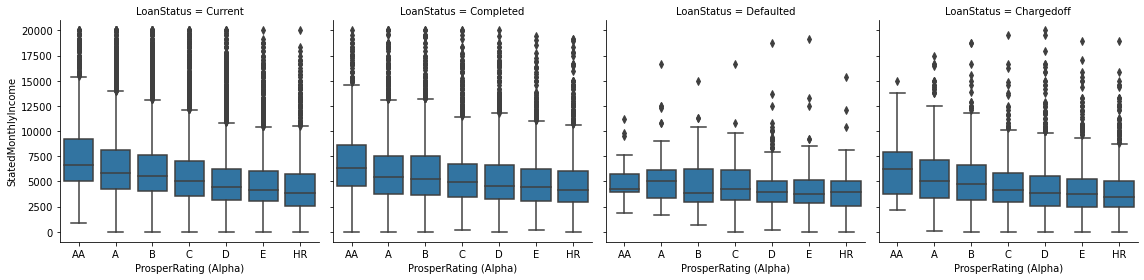

In [ ]:
g = sb.FacetGrid(data = df, col = 'LoanStatus', height = 4)
g.map(sb.boxplot, "ProsperRating (Alpha)", "StatedMonthlyIncome");

The Defaluted loans has the smaller borrower's monthly income in the different prosper Ratings



### How can Borrower APR be affected by Terms and prosper score ? 

Text(0.5, 1.0, 'Borrower APR according to Terms and prosper score')

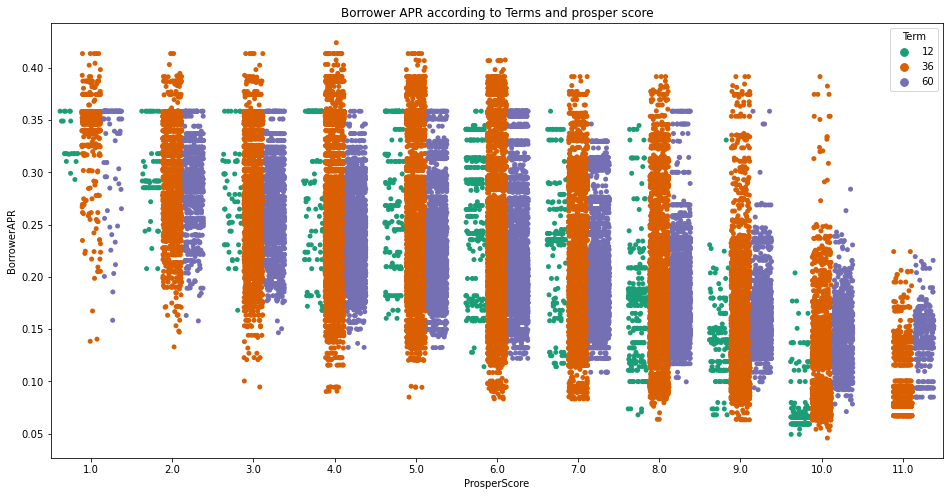

In [ ]:
plt.figure(figsize=[16,8])
sb.stripplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'Term',
         jitter = 0.35, dodge = True, palette = "Dark2")
plt.title("Borrower APR according to Terms and prosper score")         

a relative high APR for the lowest prosper score specially in 2 year term

in the one year term with high prosper score we can notice lower APR compared to other terms